## Sieci wielowarstwowe

<mark>Perceptrony są zasadniczo ograniczone </mark>przez ich możliwości do <mark>dzielenia przestrzeni za pomocą hiperpłaszczyzn.</mark> Jeżeli <mark>grupy nie są liniowo separowalne, </mark>do ich klasyfikacji potrzebne są bardziej złożone mechanizmy, <mark>np. sieci wielowartwowe. Dodanie kolejnej warstwy na wyjściu poprzedniej pozwala na zbudowanie znacznie bardziej skomplikowanej funkcji podziału przestrzeni,</mark> wiąże się jednak z różnymi utrudnieniami, m.in. uczenia.


## Problem XOR
Zbudujemy prostą sieć neuronową z jedną warstwą ukrytą.
Wykorzystamy ją do rozwiązania problemu XOR. Jest to potencjalnie banalne zadanie, które jednak jest nieliniowe.\
W ramach przypomnienia, weźmy tabelę wartości logicznych XOR



X1  | X2  | Y_XOR

 0  | 0   | 0\
 0  | 1   | 1\
 1  | 0   | 1\
 1  | 1   | 0

Oczekujemy:
- Na wejściu: x1 i x2
- Na wyjściu: x1 XOR x2


W ksiązce "Perceptrony: wprowadzenie do geometrii obliczeniowej" autorstwa Marvina Minsky'ego i Seymoura Paperta (1969) wyraźnie stwierdzone zostaje, że sieć neuronowa z jednym neuronem nie może rozwiązać problemu XOR (czyli alternatywy wykluczającej).

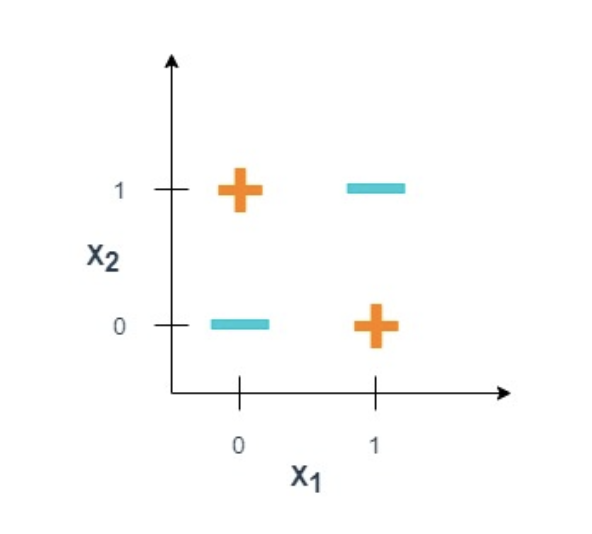

In [ ]:
import numpy as np

# tablica wejść
X = np.array([
    [1,1],
    [0,0],
    [1,0],
    [0,1]
], dtype=np.float32)
X

array([[1., 1.],
       [0., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# tablica oczekiwanych wyjść
y = np.array([
    0,
    0,
    1,
    1
], dtype=np.float32)
y

array([0., 0., 1., 1.], dtype=float32)

In [ ]:
# zastosowanie pojedynczego Perceptronu do rozwiazania problemu
from sklearn.linear_model import Perceptron

neuron = Perceptron(tol=1e-3, max_iter = 1000)

neuron.fit(X, y)

# możemy zobaczyć, że maksymalne accuracy, jakie jesteśmy w stanie osiągnąć, to 0.5.
# Nie jesteśmy w stanie tak podzielić przestrzeni jedną prostą,
# by podzieliła ją na dwie części zgodnie z problemem XOR.
print('score:', neuron.score(X, y))
print('predictions:', neuron.predict(X))

score: 0.5
predictions: [0. 0. 0. 0.]


<mark> accuracy na poziomie 0.5 oznacza losowość podziału </mark>

In [3]:
import numpy as np
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
print(x)
y = np.linspace(0, 1, ny)
print(y)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)
# czyli dostajemy nastepną współrządną x oraz nastepne współrzedne dla y kolejnych punktów z naszej siatki

[0.  0.5 1. ]
[0. 1.]
[[0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0. 0. 0.]
 [1. 1. 1.]]
[[0.  0.5 1. ]
 [0.  0.5 1. ]] [[0. 0. 0.]
 [1. 1. 1.]]


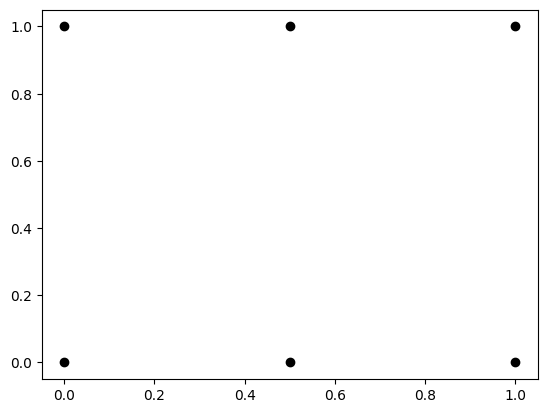

In [4]:
import matplotlib.pyplot as plt
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

In [6]:
xv.ravel()    # naprostowuje tabele, na tabele 1-D

array([0. , 0.5, 1. , 0. , 0.5, 1. ])

In [9]:
xv.reshape((6,1))   # jako argument podajemy

array([[0. ],
       [0.5],
       [1. ],
       [0. ],
       [0.5],
       [1. ]])

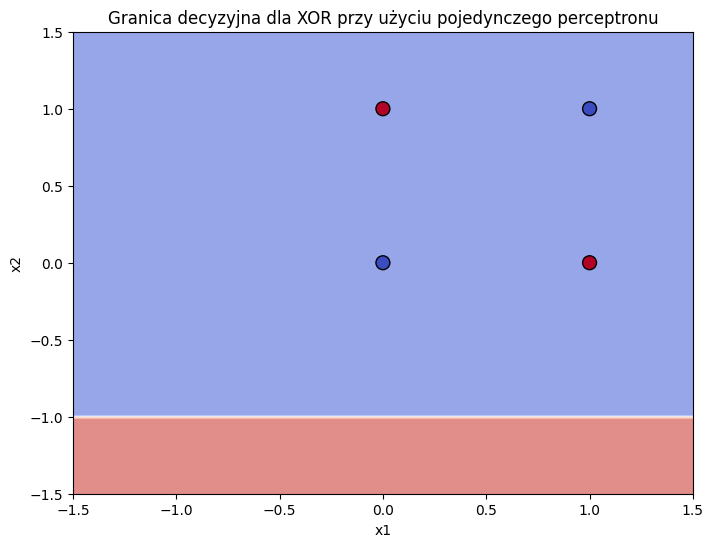

In [ ]:
import matplotlib.pyplot as plt

# Tworzenie siatki dla wizualizacji
#np.meshgrid(*xi)     pobiera arraye 1-D, które reprezentują współrzędne kolejnych osi
                    # zwraca tuple arrayów, czyli (N1,)
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
test_points = np.c_[xx.ravel(), yy.ravel()]
predictions = neuron.predict(test_points).reshape(xx.shape)

# Wizualizacja podziału przestrzeni dla perceptronu
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.6, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=100, cmap='coolwarm', marker='o')
plt.title("Granica decyzyjna dla XOR przy użyciu pojedynczego perceptronu")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [ ]:
# zastosowanie do tego samego problemu prostej sieci wielowarstwowej
from sklearn.neural_network import MLPClassifier

# tworzymy sieć z 5 neuronami na wejściu i 5 neuronami w warstwie ukrytej
model = MLPClassifier(hidden_layer_sizes = (5,5), max_iter=2000)

# możemy zobaczyć, że teraz już wyjście powinno zgadzać się z naszymi oczekiwaniami
model.fit(X, y)
print('score:', model.score(X,y))
print('predictions:', model.predict(X))

score: 1.0
predictions: [0. 0. 1. 1.]


# Czym jest hidden_layer  w klasyfikatorze?
hidden_layer = (ile_neuronow_w_pierwszej_ukrytej_warstwie, ile_neuronow_w_drugiej_ukrytej,...) - my tylko zapisujemy ile chcemy miec neuronow w ukrytych warstwach modelu

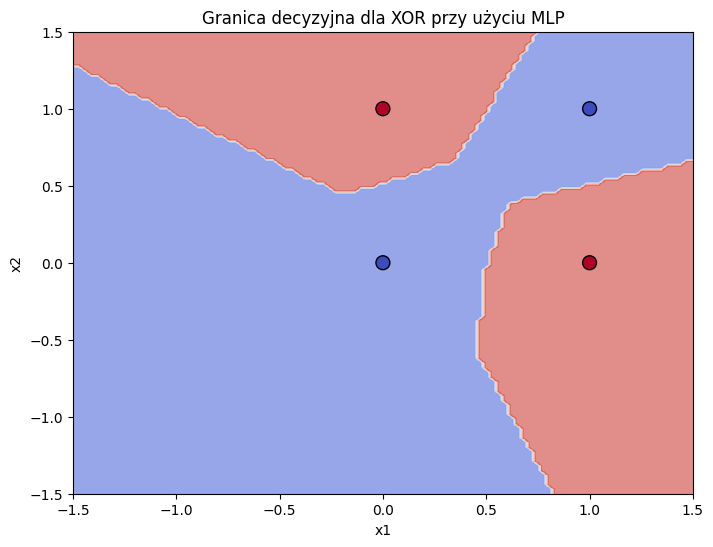

In [ ]:
# Wizualizacja podziału przestrzeni dla MLP
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
test_points = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(test_points).reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, predictions, alpha=0.6, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=100, cmap='coolwarm')
plt.title("Granica decyzyjna dla XOR przy użyciu MLP")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Różne funkcje aktywacji

<mark>Klasyczny perceptron używa głównie prostej schodkowej funkcji aktywacji,</mark> jednak <mark> w praktyce</mark>  częściej wykorzystuje się <mark> funkcje pozwalające na łatwiejszą interpretację wyniku</mark>  i na liczenie pochodnej po tym wyniku (co jest potrzebne do uczenia). Przykładowe funkcje wykorzystywane w sieciach neuronowych:

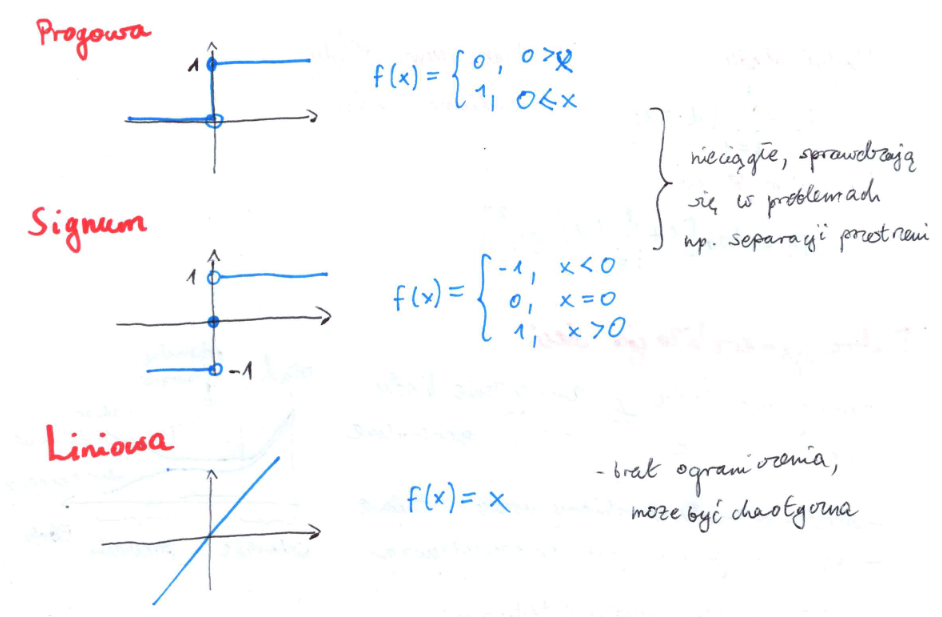

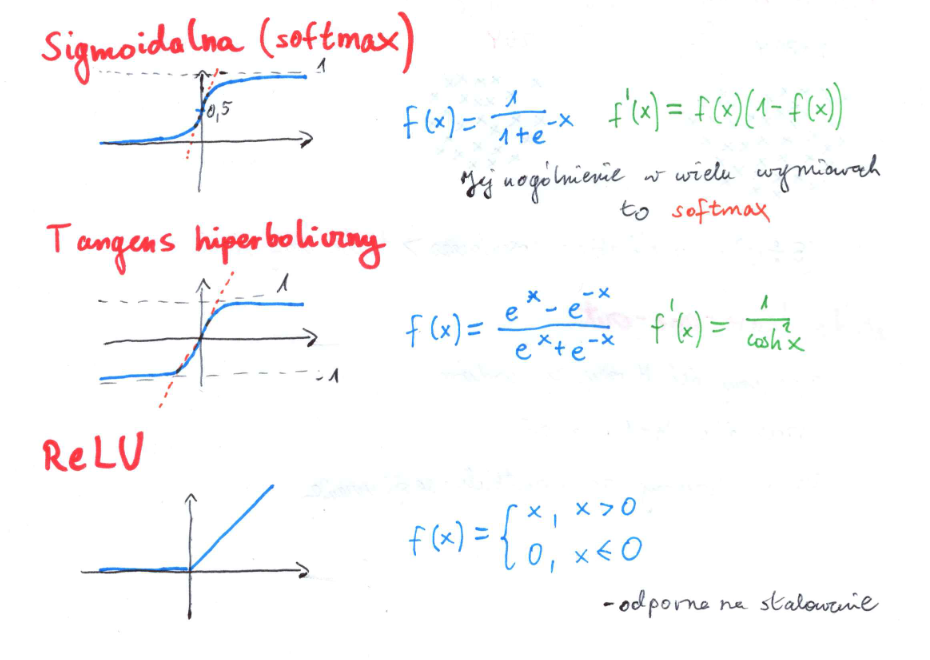

Teraz przyjrzyjmy się sieci ułożonej z kilku warstw:

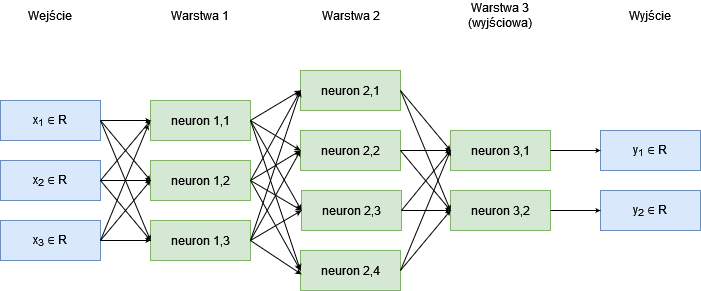

Jeżeli zamierzamy przeprowadzić uczenie sieci z nauczycielem, nie możemy tego zrobić prostymi metodami takimi jak metoda Widrowa-Hoffa ze względu na ukrytą warstwę. Zamiast tego używamy algorytmów, które:


*   Liczą **pochodną funkcji błędu** po każdej wadze i każdym biasie
*   Przesuwają wagę zgodnie z pochodną w stronę jej minimum

Najprościej można przedstawić działanie algorytmów optymalizujących wagi jako:

$W^{iter+1} = W^{iter} + f(\nabla E)$

Gdzie $E$ jest funkcją błędu pomiędzy oczekiwanym a faktycznym wyjściem. W najprostszym algorytmie (Gradient Descent) wagi są aktualizowane po prostu jako:

$W^{iter+1} = W^{iter} - r \nabla E$

Gdzie $r$ jest tzw. współczynnikiem uczenia, jakąś małą stałą służącą do skalowania tego, jak bardzo przesuwane są wagi w każdej iteracji. W lepszych algorytmach, takich jak ADAM, współczynnik ten jest liczony od nowa w każdej iteracji, dopasowując rozmiar kroku do warunków.

Jak policzyć pochodne błędu sieci po każdej wadze? Używając **twierdzenia o pochodnej funkcji złożonej**:

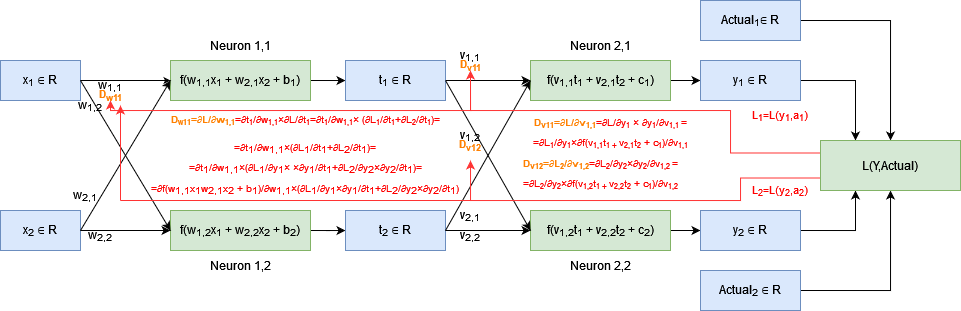

Ze względu na to, że na początku liczymy błąd dla warstwy najbliżej wyjścia, a później idziemy coraz głębiej w stronę wejścia, nazywamy ten proces **propagacją wsteczną** (backpropagation).

### Jak dobrać strukturę sieci?

<mark> Jest to bardzo złożone zagadanienie, którego automatyzacja jest dopiero rozwijana (większość badań pochodzi z 2019 i później).</mark>


*   <mark> Więcej neuronów - więcej informacji, bardziej złożone separacje przestrzeni lub aproksymacje funkcji, zdolność do rozwiązywania bardziej skomplikowanych problemów</mark>
*   Mniej neuronów - szybsze uczenie, mniejsze ryzyko przeuczenia, lepsza generalizacja problemów

### Dobra generalizacja problemu

Chcemy, żeby sieci dobrze radziły sobie nie tylko z naszym zbiorem wykorzystanym do ich uczenia, ale żeby raczej odnalazły separację występującą faktycznie "w rzeczywistości", żeby dało się je wykorzystywać do prawdziwych problemów. Zbyt wiele epok uczenia może doprowadzić do tzw. <mark>**przeuczenia sieci**, czyli do momentu, w którym sieć polepsza wyniki na zbiorze uczącym kosztem gorszych wyników na ogólnym problemie. Wówczas uczy się ona danych treningowych "na pamięć", zaś sam model nie przedstawia dobrze generalizacji problemu.</mark>

Zastanówmy się nad generalizacją problemów na przykładzie poniższego podziału przestrzeni:

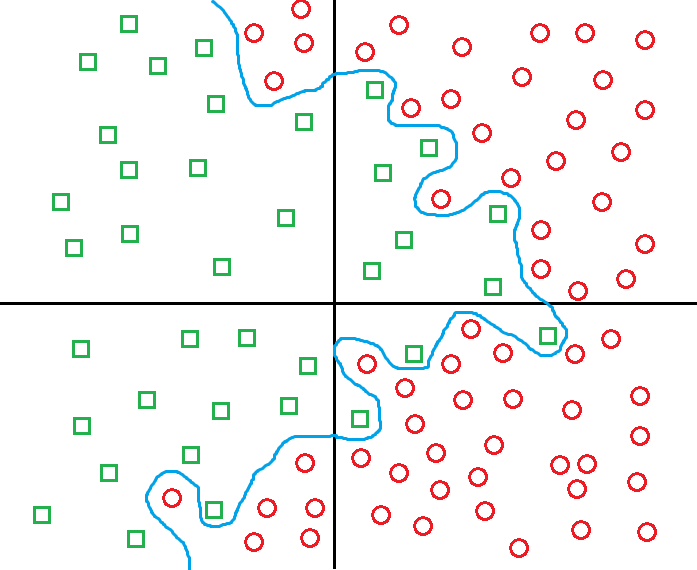

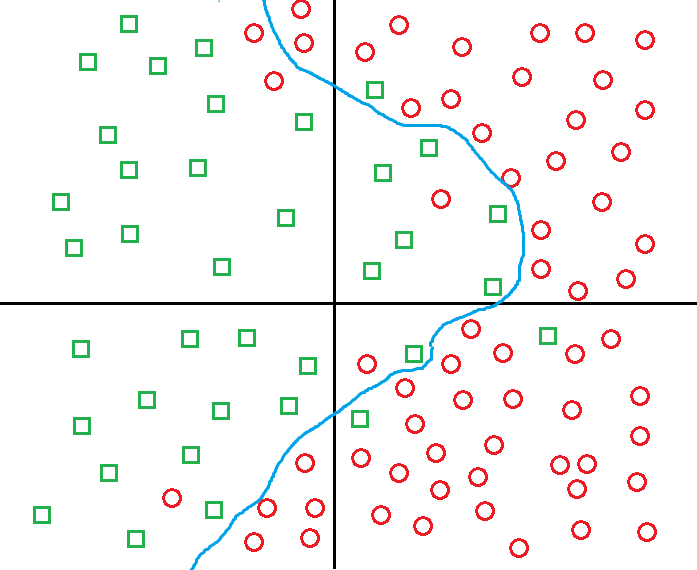

### Przykład przeuczenia

Dokładność na zbiorze treningowym: 0.8457
Dokładność na zbiorze testowym: 0.7000


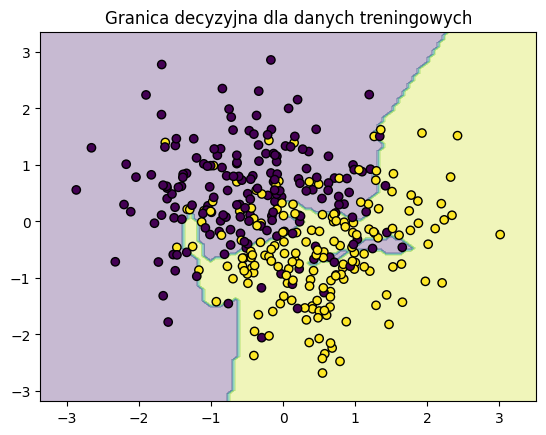

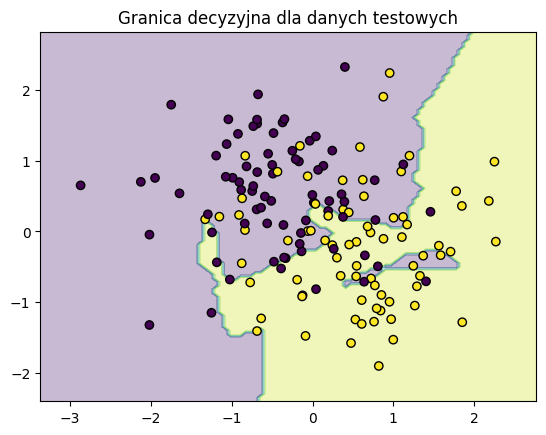

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Generowanie danych
X, y = make_moons(n_samples=500, noise=0.7, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tworzenie bardziej rozbudowanego modelu MLP
mlp = MLPClassifier(hidden_layer_sizes=(300, 300, 300), activation='relu', solver='adam',
                    max_iter=3000, alpha=0.0001, random_state=42)

# Trenowanie modelu
mlp.fit(X_train, y_train)

# Ocena modelu
train_accuracy = accuracy_score(y_train, mlp.predict(X_train))
test_accuracy = accuracy_score(y_test, mlp.predict(X_test))

print(f"Dokładność na zbiorze treningowym: {train_accuracy:.4f}")
print(f"Dokładność na zbiorze testowym: {test_accuracy:.4f}")

# Wizualizacja decyzji modelu
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')

fig, ax = plt.subplots()
plot_decision_boundary(mlp, X_train, y_train, ax)
ax.set_title("Granica decyzyjna dla danych treningowych")
plt.show()

fig, ax = plt.subplots()
plot_decision_boundary(mlp, X_test, y_test, ax)
ax.set_title("Granica decyzyjna dla danych testowych")
plt.show()

### Wielowarstwowa sieć neuronową do bardziej złożonego problemu


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2)


# odsyłamy oczywiście do dokumentacji po wyjaśnienie argumentów, ale pokrótce:
# solver - algorytm uczący, SGD = Stochastic Gradient Descent
# hidden_layer_sizes - rozmiary ukrytych warstw
# activation - funkcja aktywacji, identity = liniowa
# stratify = y oznacza, że podział zbioru na część treningową i testową zachowa tę samą proporcję klas w obu zbiorach, jaką miały w oryginalnym zbiorze danych.

network = MLPClassifier(solver='sgd',hidden_layer_sizes=(10, 5), max_iter = 1000, tol = 0.001, activation = 'identity')
network.fit(X_train,y_train)
predicted_labels = network.predict(X_train)
matrix = confusion_matrix(y_train, predicted_labels)
matrix

array([[40,  0,  0],
       [ 0, 37,  3],
       [ 0,  0, 40]])

In [ ]:
network.score(X_train,y_train)

0.975

In [ ]:
predicted_labels_test = network.predict(X_test)
matrix_test = confusion_matrix(y_test,predicted_labels_test)
matrix_test

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [ ]:
network.score(X_test,y_test)

0.9666666666666667

In [ ]:
# możemy jak zwykle zobaczyć wagi neuronów...
network.coefs_

[array([[ 0.38040212,  0.35624954,  0.06889621,  0.5825957 , -0.30911474,
         -0.17099909, -0.0853646 , -0.04209714, -0.79603484, -0.50215209],
        [ 0.45754677,  0.20738346, -0.59213978, -0.46554464,  0.27688041,
          0.53155273, -0.42156489,  0.6961502 , -0.00364333,  0.00814486],
        [ 0.2076562 ,  0.53798817,  0.02220965, -0.10952192,  0.28454213,
         -0.6201293 ,  0.2251768 , -0.35448653,  0.48050193,  0.04970769],
        [ 0.52475827,  0.34371314, -0.50296881,  0.45103235,  0.08811114,
          0.34928793,  0.83656087,  0.05354932,  0.6184555 ,  0.34186412]]),
 array([[-0.10752784, -0.42562783, -0.27842905, -0.4203478 ,  0.42531437],
        [ 0.76298111,  0.63457229, -0.07124175,  0.15906296, -0.0640985 ],
        [ 0.53177128, -0.05717203, -0.51877849, -0.30352898,  0.00914023],
        [-0.01451644,  0.05423244,  0.36932735,  0.42460122, -0.54189477],
        [-0.14867416, -0.437192  ,  0.36747146, -0.04661242, -0.24504886],
        [-0.54235885,  0.24

In [ ]:
# ...i biasy:
network.intercepts_

[array([ 0.04830098,  0.19774181,  0.24416378,  0.38781598, -0.30950417,
        -0.31116447, -0.57916018,  0.37485306, -0.18092809,  0.36951472]),
 array([-0.6022591 ,  0.25302507, -0.13204267, -0.60639354, -0.29735353]),
 array([-0.45584295,  0.57780227,  0.0950521 ])]

### Inne metryki, służace do ewaluacji modeli

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Dodatkowe metryki
# Stosujemy 'weighted' ponieważ bierze pod uwagę liczność każdej klasy.
# Jest to szczególnie ważne w klasyfikacji wieloklasowej, aby nie faworyzować dominujących klas.
accuracy = accuracy_score(y_test, predicted_labels_test)  # Dokładność
precision = precision_score(y_test, predicted_labels_test, average='weighted')  # Precyzja
recall = recall_score(y_test, predicted_labels_test, average='weighted')  # Czułość (ang. recall)
f1 = f1_score(y_test, predicted_labels_test, average='weighted')  # Miara F1

print(f"Dokładność: {accuracy:.4f}")
print(f"Precyzja: {precision:.4f}")
print(f"Czułość: {recall:.4f}")
print(f"Miara F1: {f1:.4f}")

# Szczegółowy raport klasyfikacji
print("\nRaport klasyfikacji:\n", classification_report(y_test, predicted_labels_test))

Dokładność: 0.9667
Precyzja: 0.9697
Czułość: 0.9667
Miara F1: 0.9666

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Macierz pomyłek (Confusion Matrix)
Macierz pomyłek przedstawia liczbę poprawnych i błędnych klasyfikacji dla każdej klasy.

- Umożliwia dokładną analizę błędów modelu.
- <mark>Przydatna do identyfikacji klas, które są najczęściej mylone.</mark>

#### Dokładność (Accuracy)
Dokładność to stosunek poprawnie zaklasyfikowanych próbek do wszystkich próbek w zbiorze testowym.

- Zakres wartości: **0 – 1** (lub **0% – 100%**)
- <mark>Im wyższa wartość, tym lepszy model.</mark>
- Wrażliwa na niezbalansowane dane – może być myląca, gdy klasy są nierównomiernie rozłożone.

#### Precyzja (Precision)
Precyzja określa, ile spośród przewidzianych przypadków dla danej klasy rzeczywiście należy do tej klasy.

- Zakres wartości: **0 – 1**
- W przypadku klasyfikacji wieloklasowej (multiclass) precyzja obliczana jest dla każdej klasy osobno, a następnie uśredniana.
- Stosowana w sytuacjach, gdy koszt fałszywych alarmów (false positives) jest wysoki (np. diagnostyka medyczna).

#### Czułość (Recall)
Czułość określa, ile rzeczywistych przypadków dla danej klasy zostało poprawnie sklasyfikowanych.

- Zakres wartości: **0 – 1**
- Dla klasyfikacji wieloklasowej obliczana jest dla każdej klasy osobno i może być uśredniana.
- Ważna w sytuacjach, gdy kluczowe jest wykrycie wszystkich przypadków danej klasy (np. wykrywanie oszustw, chorób).

#### Miara F1 (F1-score)
<mark>Miara F1 to średnia harmoniczna precyzji i czułości, która równoważy oba wskaźniki.</mark>

- Zakres wartości: **0 – 1**
- W klasyfikacji wieloklasowej obliczana osobno dla każdej klasy, a następnie może być uśredniona.
- <mark>Przydatna, gdy ważne jest jednoczesne uwzględnienie zarówno precyzji, jak i czułości.</mark>
- Szczególnie użyteczna w problemach z niezbalansowanymi danymi.


# Komentarz laby
Struktura sieci = ile neuronow.

Przeuczenie = dopasowujemy sie do szumow za bardzo, i mmay wyuczona siec na sztucznych danych, nie generalnych.

<img src = "https://www.researchgate.net/publication/304674901/figure/fig6/AS:668649476067338@1536429866393/Precision-versus-accuracy-The-bullseye-represents-the-true-value-eg-the-true.ppm">


## Porównanie średnich
srednia harmoniczna<=arytm<=geom
w harmonicznej jest <mark>najwiekszy wpływ najmniejszego członu</mark>




## Zadania do samodzielnego wykonania

1.

Proszę pobrać plik medicine.txt, zawierający wyniki analizy nowego leku. W dwóch pierwszych kolumnach znajduje się stężenie dwóch składników w próbce krwi, w trzeciej - informacja o tym, czy lek zadziałał. Dane nie są znormalizowane. Proszę znormalizować dane, podzielić je na zbiór uczący i testujący w proporcjach 80-20 (należy pamiętać o proporcjach klas), zaproponować wielowarstwową sieć neuronową i zbadać jej skuteczność dla różnych ilości warstw i neuronów w tych warstwach. Proszę narysować w jaki sposób sieć dokonała podziału w zbiorze dla kilku sieci (zarówno tych z dobrymi, jak i złymi wynikami) oraz jak wygląda poprawny podział zbioru. Proszę również przedstawić wyniki dla 5-8 różnych struktur sieci, wraz z oceną, która z nich najlepiej poradziła sobie z zadaniem klasyfikacji.

2.

Proszę pobrać zbiór ręcznie pisanych cyfr z https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits (można to zrobić funkcją datasets.load_digits() w sklearnie). Proszę sprawdzić skuteczność klasyfikacji na tym zbiorze za pomocą wielowarstwowej sieci neuronowej.

3.

Proszę sprawdzić, jak zmieni się poprawność klasyfikacji na zbiorze ręcznie pisanych cyfr dla różnych architektur sieci, funkcji aktywacji, ilości epok uczenia i algorytmów uczenia. Proszę zbadać wpływ współczynnika uczenia (learning_rate) podczas używania algorytmu SGD. Dla najciekawszych przykładów proszę wypisać macierze pomyłek oraz wyliczyć wszystkie poznane metryki.

4.

Proszę pobrać zbiór yeast z UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Yeast). Proszę we własnym zakresie dokonać wstępnej analizy i przygotowania tego zbioru. Warto zauważyć, że liczności różnych klas wewnątrz zbioru są _bardzo_ nierówne. Proszę spróbować osiągnąć jak najlepsze wyniki i narysować dla nich macierz pomyłek (dla zbioru uczącego i testującego) oraz wyliczyć wszystkie poznane do tej pory metryki. Czy dokładność na poziomie 0.5 dla takiego zbioru jest dobra? Mogą państwo zbadać też czas wykonywania funkcji fit dla różnych konfiguracji sieci.

#### Materiały:

Dokumentacja:

* https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

* https://ipython.readthedocs.io/en/stable/interactive/magics.html - funkcja do uproszczonego liczenia czasu wykonywania kodu w notatniku.

## Sekcja dla zainteresowanych

### Nietypowy przykład outliera - planeta COCONUTS-2b

Wśród odkrytych egzoplanet (planet pozasłonecznych) najwięcej jest takich o stosunkowo krótkim roku, okrążających swoją gwiazdę w ciągu zaledwie kilkunastu ziemskich dni. Wyjątkiem od tej reguły jest planeta COCONUTS-2b, okrążająca swoją gwiazdę (L 34-26) w ciągu... 1.1 miliona ziemskich lat. Średnia długość roku znanych egzoplanet bez COCONUTS-2b wynosi 343.6 dnia, natomiast z COCONUTS-2b wynosi 13783.3 dni... **To pokazuje jak ważne jest filtrowanie outlierów!**

Jednocześnie jest to przykład outliera, który nie jest błędem w pomiarach, tylko wyjątkowym fenomenem, który może nas dużo nauczyć o zagadnieniu, którym się zajmujemy. Możliwe, że planet takich jak COCONUTS-2b jest więcej, ale nie jesteśmy w stanie ich jeszcze odkrywać.

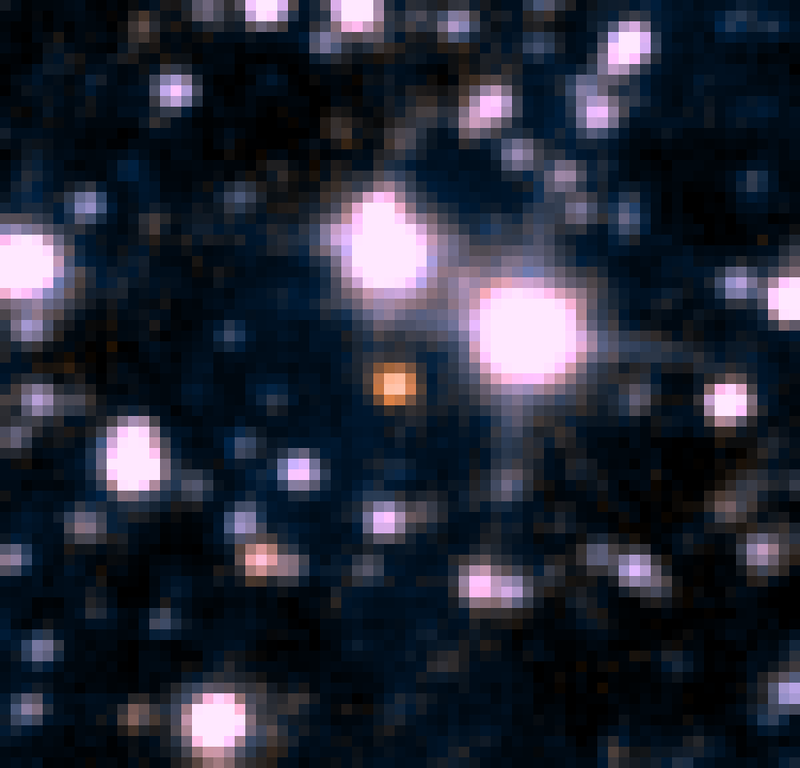

*Coconuts 2-B (czerwona kropka pośrodku)*

By Meli thev - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=122791385